In [1]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
data=datasets.load_digits()
trainX,testX,trainY,testY=train_test_split(data.data,data.target)
# 设置有偏数据集，变为只有0和1两类
trainY[trainY!=0]=1
testY[testY!=0]=1

In [2]:
clf=LogisticRegression()
clf.fit(trainX,trainY)
y_predict=clf.predict(testX)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [3]:
def TN(testY,predictY):
    return  np.sum((y_predict==0) &(testY==0))

def FP(testY,predictY):
    return  np.sum((y_predict==1) &(testY==0))
def FN(testY,predictY):
    return  np.sum((y_predict==0) &(testY==1))
def TP(testY,predictY):
    return  np.sum((y_predict==1) &(testY==1))
# 精准率 精准率就是“预测为正例的那些数据里预测正确的数据个数”
def precision_score(testY,predictY):
    return  TP(testY,predictY)/(TP(testY,predictY)+FP(testY,predictY))
# 召回率 召回率就是“真实为正例的那些数据里预测正确的数据个数”
def recall_score(testY,predictY):
    return  TP(testY,predictY)/(TP(testY,predictY)+FN(testY,predictY))
# 在预测股票的时候，我们更关心精准率，即我们预测升的那些股票里，真的升了有多少，
# 因为那些我们预测升的股票都是我们投钱的。而在预测病患的场景下，我们更关注召回率，
# 即真的患病的那些人里我们预测错了情况应该越少越好，因为真的患病如果没有检测出来，
# 结果其实是很严重的，之前那个无脑的算法，召回率就是 0。
def confusion_matrix(testY,predictY):
    return np.array([[TN(testY,predictY),FP(testY,predictY)],[FN(testY,predictY),TP(testY,predictY)]])
def f1_score(testY,predictY):
    return 2* precision_score(testY,predictY)*recall_score(testY,predictY)/((precision_score(testY,predictY)+recall_score(testY,predictY)))

In [4]:
print("精准率:",precision_score(testY,y_predict))
print("召回率:",recall_score(testY,y_predict))
print("矩阵:",confusion_matrix(testY,y_predict))
print("f1score:",f1_score(testY,y_predict))



精准率: 0.9975369458128078
召回率: 1.0
矩阵: [[ 44   1]
 [  0 405]]
f1score: 0.9987669543773119


In [5]:
# sklearn 里的精确率
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
print("精准率:",precision_score(testY,y_predict))
print("召回率:",recall_score(testY,y_predict))
print("矩阵:",confusion_matrix(testY,y_predict))
print("f1score:",f1_score(testY,y_predict))

精准率: 0.9975369458128078
召回率: 1.0
矩阵: [[ 44   1]
 [  0 405]]
f1score: 0.9987669543773119


# 精准率-召回率曲线

In [6]:
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
data=datasets.load_digits()
trainX,testX,trainY,testY=train_test_split(data.data,data.target)
# 设置有偏数据集，变为只有0和1两类
trainY[trainY!=0]=1
testY[testY!=0]=1
clf=LogisticRegression()
clf.fit(trainX,trainY)
y_predict=clf.predict(testX)

C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


C:\Users\Administrator\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


精准率: 0.9511111111111111
召回率: 0.9511111111111111


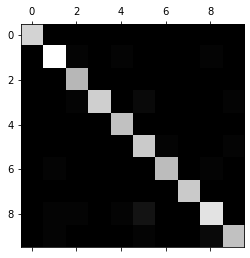

In [7]:
#多分类精准率召回率
import sklearn.datasets as datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
data=datasets.load_digits()
trainX,testX,trainY,testY=train_test_split(data.data,data.target)
clf=LogisticRegression()
clf.fit(trainX,trainY)
y_predict=clf.predict(testX)
print("精准率:",precision_score(testY,y_predict,average='micro'))
print("召回率:",recall_score(testY,y_predict,average='micro'))
confusion_matrix=confusion_matrix(testY,y_predict)
plt.matshow(confusion_matrix, cmap=plt.cm.gray)
plt.show()